# Import Data and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
import io
import scipy.stats as st
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import datetime
import graphviz

In [2]:
#Mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Dataframe
df = pd.read_csv('drive/My Drive/Colab Notebooks/Data/cp_data_eng_full.csv')

In [ ]:
#Check dataset attributes and type
df.info()

In [ ]:
df.head()

In [6]:
#Check Missing value
df.isnull().sum()

NO                      0
Customer_ID             0
Response              290
Sex                    61
Age                    61
                     ... 
generation            207
contraction_year      207
contraction_mon       207
contraction_day       207
contraction_day_JP    207
Length: 69, dtype: int64

In [7]:
#Shape of dataframe
df.shape

(1293, 69)

In [8]:
#Remove the missing response
df = df.dropna(subset = ['Response'])

In [9]:
#Check Duplicate
df[df.duplicated('Customer_ID')]

,NO,Customer_ID,Response,Sex,Age,Card_type,Shopping,Cashing,ETC,Card_contraction,...,charge_Wednesday,charge_Friday,charge_Thursday,charge_Saturday,charge_Sunday,generation,contraction_year,contraction_mon,contraction_day,contraction_day_JP
1000,1000,80109887,no reply,M,44.0,affiliated card C,0.0,0.0,0.0,2003/3/25,...,NaN,NaN,10430.0,58370.0,35090.0,40s,2003.0,3.0,3.0,Tuesday


In [10]:
#Remove Duplicate
df.drop_duplicates(subset ='Customer_ID', keep = 'first', inplace = True)

In [11]:
#Fail to change min_used_date
#There is an outlier in min_used _date
df[df['min_used_date'] == '41000']

,NO,Customer_ID,Response,Sex,Age,Card_type,Shopping,Cashing,ETC,Card_contraction,...,charge_Wednesday,charge_Friday,charge_Thursday,charge_Saturday,charge_Sunday,generation,contraction_year,contraction_mon,contraction_day,contraction_day_JP
1002,1002,80109889,no reply,M,200.0,original,0.0,1.0,0.0,2003/2/15,...,NaN,NaN,NaN,NaN,74310.0,40s,2003.0,2.0,7.0,Saturday


In [12]:
#Fail to change max_used_date into datetime
#There is an outlier in min_used _date
df[df['max_used_date'] == '20NA']

,NO,Customer_ID,Response,Sex,Age,Card_type,Shopping,Cashing,ETC,Card_contraction,...,charge_Wednesday,charge_Friday,charge_Thursday,charge_Saturday,charge_Sunday,generation,contraction_year,contraction_mon,contraction_day,contraction_day_JP
57,58,80005291,no reply,M,32.0,affiliated card C,1.0,0.0,0.0,2003/2/3,...,4540.0,82600.0,NaN,82570.0,30610.0,30s,2003.0,2.0,2.0,Monday


In [13]:
#Remove error
df = df[df.min_used_date != '41000']

In [14]:
#Remove error
df = df[df.max_used_date != '20NA']

In [15]:
df['Card_contraction'] = pd.to_datetime(df['Card_contraction'])
df['min_used_date'] = pd.to_datetime(df['min_used_date'])
df['max_used_date'] = pd.to_datetime(df['max_used_date'])
df['expiration_date'] = pd.to_datetime(df['expiration_date'])

In [ ]:
df.info()

In [17]:
#Data Type
df_datetime = df[['min_used_date', 'max_used_date', 'Card_contraction', 'expiration_date']]
df_continous = df[['Age', 'onlineservice_avg_mon', 'cashing_avg_mon', 'food_avg_mon', 'speciality_avg_mon', 'general_avg_mon', 'network_avg_mon', 'onlineshopping_avg_mon', 'beauty_avg_mon', 'amusement_avg_mon', 'travel_avg_mon', 'onlineservice_avg_lmon', 'cashing_avg_lmon', 'food_avg_mon.1', 'speciality_avg_lmon', 'general_avg_lmon', 'network_avg_lmon', 'onlineshopping_avg_lmon', 'beauty_avg_lmon', 'amusement_avg_lmon', 'travel_avg_lmon', 'shopping_avg', 'cashing_avg', 'ETC_avg', 'shopping_rec', 'cashing_rec', 'ETC_rec', 'max_charge', 'min_charge', 'avg_charge', 'charge_avg_per_mon', 'charge_lmon','charge_Monday','charge_Tuesday','charge_Wednesday','charge_Thursday','charge_Friday','charge_Saturday','charge_Sunday']]
df_category = df[['Response', 'Sex', 'Card_type', 'Shopping', 'Cashing', 'ETC', 'Card_grade', 'Job', 'On_the_job', 'marriage', 'questionnaire1', 'questionnaire2', 'questionnaire3', 'questionnaire4', 'questionnaire5', 'generation', 'contraction_year', 'contraction_day', 'contraction_mon', 'contraction_day_JP', 'No_function', 'No_member_store_use', 'No_category_use', 'No_records']].astype('category')

What have been done:
1. Import uncleaned data and library packages
2. Removing missing value with Response column as subset
3. Change data type
4. Group each data based on the data type

What to do in univariate analysis:
1. Do statistic and Visualization for continous and category data.
2. Fill missing values

# Univariate Analysis

In [18]:
#Descriptive Statistics of numeric variable
df_continous.describe()
#Age 200 possibly is an outlier

,Age,onlineservice_avg_mon,cashing_avg_mon,food_avg_mon,speciality_avg_mon,general_avg_mon,network_avg_mon,onlineshopping_avg_mon,beauty_avg_mon,amusement_avg_mon,...,avg_charge,charge_avg_per_mon,charge_lmon,charge_Monday,charge_Tuesday,charge_Wednesday,charge_Thursday,charge_Friday,charge_Saturday,charge_Sunday
count,1000.000000,266.000000,799.000000,239.000000,707.000000,384.000000,205.000000,87.000000,101.00000,99.000000,...,1000.000000,1000.000000,1000.000000,523.000000,547.000000,563.000000,638.000000,509.000000,475.000000,593.000000
mean,35.353000,26893.105263,25650.326658,26151.656904,26528.203678,26957.869792,23949.082927,29273.344828,23538.39604,22328.636364,...,23878.395000,26314.356000,26046.240000,42647.724665,43370.201097,42622.735346,50227.194357,41581.100196,41130.947368,43076.239460
std,11.615046,28188.719320,26498.516510,28845.564267,29586.219187,30446.868780,25017.288591,27542.632448,23550.70138,24882.683111,...,18233.165558,20595.105894,33481.845795,55742.548872,51175.366439,49128.414338,61778.923635,53922.614053,47522.908499,55251.231983
min,14.000000,2020.000000,2030.000000,2140.000000,2010.000000,2010.000000,2140.000000,2120.000000,2000.00000,2070.000000,...,2110.000000,2110.000000,2000.000000,2040.000000,2010.000000,2040.000000,2000.000000,2040.000000,2030.000000,2000.000000
25%,28.000000,8032.500000,8442.500000,7585.000000,7307.500000,7900.000000,7370.000000,9707.500000,7940.00000,5995.000000,...,9827.000000,10277.000000,5927.500000,8330.000000,9585.000000,9175.000000,10062.500000,8870.000000,8425.000000,9810.000000
50%,35.000000,18585.000000,18300.000000,16190.000000,17295.000000,16202.500000,16380.000000,19820.000000,16370.00000,16240.000000,...,19804.500000,21521.000000,14370.000000,24170.000000,26900.000000,25440.000000,28100.000000,21070.000000,23430.000000,25800.000000
75%,42.000000,34255.000000,33093.000000,34030.000000,34991.500000,34002.500000,30280.000000,38150.000000,31930.00000,28745.000000,...,32098.250000,35330.500000,32517.500000,50190.000000,55870.000000,57470.000000,68352.500000,53380.000000,53735.000000,56070.000000
max,200.000000,222300.000000,268490.000000,210580.000000,294020.000000,235160.000000,148240.000000,114580.000000,144160.00000,164150.000000,...,110525.000000,122530.000000,363860.000000,361110.000000,392990.000000,374380.000000,518110.000000,468760.000000,279470.000000,582660.000000


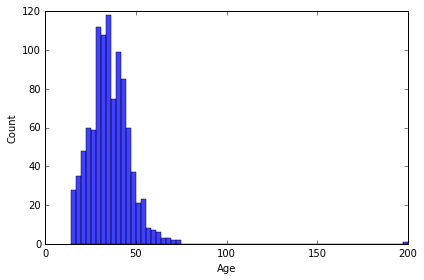

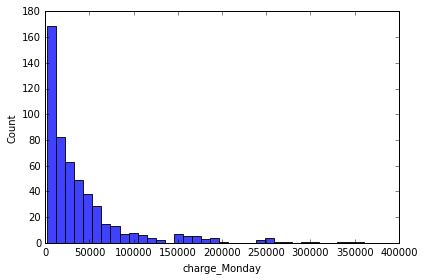

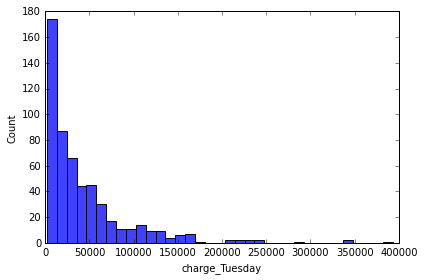

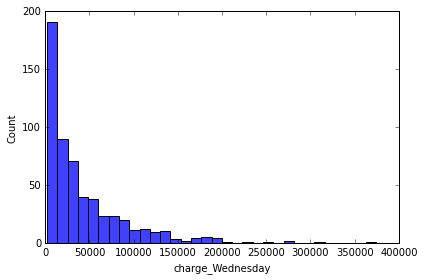

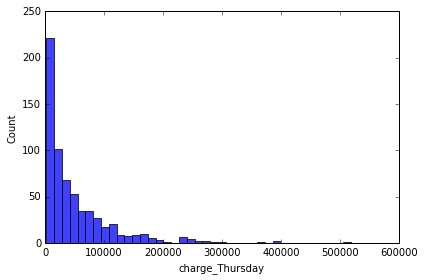

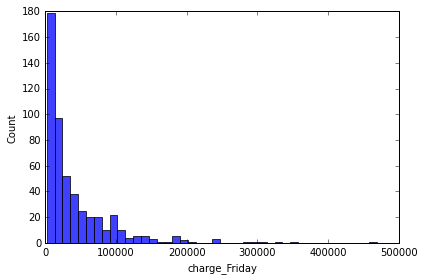

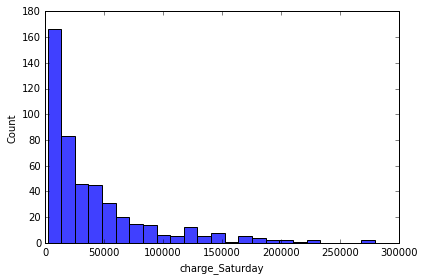

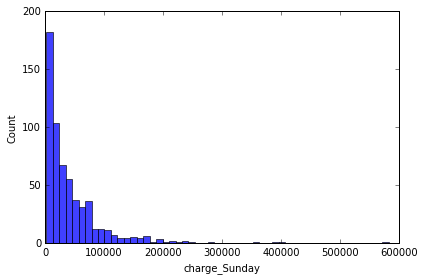

In [19]:
#Visualization in continous variable
def histplot (var):
  sns.histplot (x = var,  data = df)
  plt.tight_layout()
  plt.show()

histplot('Age') #confirm outlier in visualization
histplot('charge_Monday')
histplot('charge_Tuesday')
histplot('charge_Wednesday')
histplot('charge_Thursday')
histplot('charge_Friday')
histplot('charge_Saturday')
histplot('charge_Sunday')
#charge_Monday until charge_Sunday is Right-skewed
#Check correlation for each day

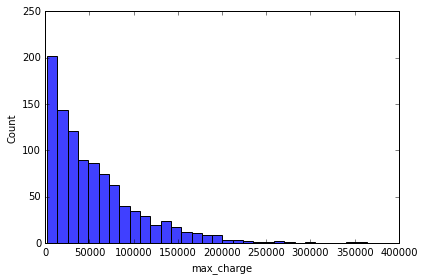

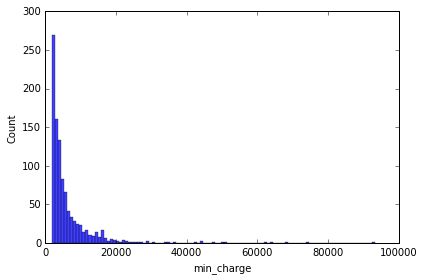

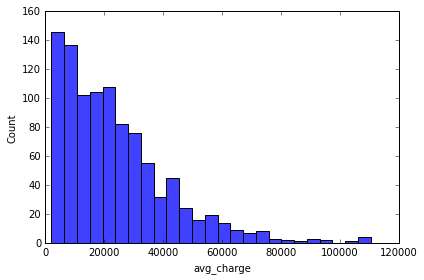

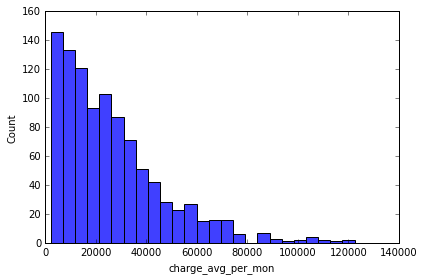

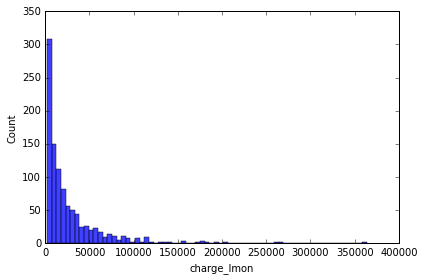

In [20]:
histplot('max_charge')
histplot('min_charge')
histplot('avg_charge')
histplot('charge_avg_per_mon')
#avg_charge and charge_avg_per_mon seems correlated
histplot('charge_lmon')
#All also right-skewed

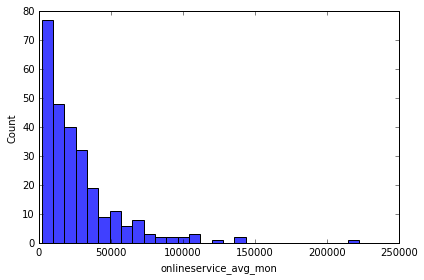

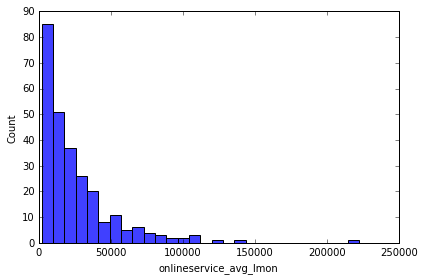

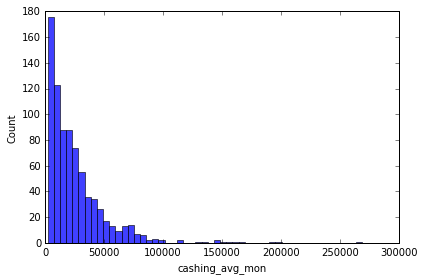

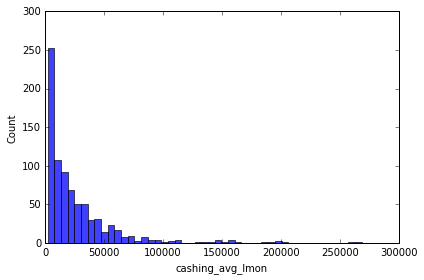

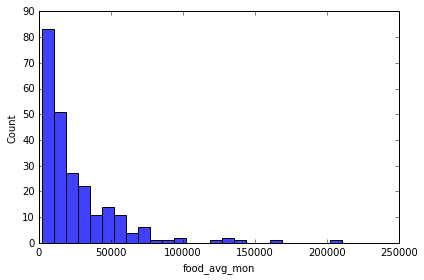

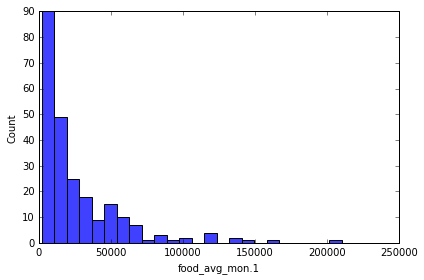

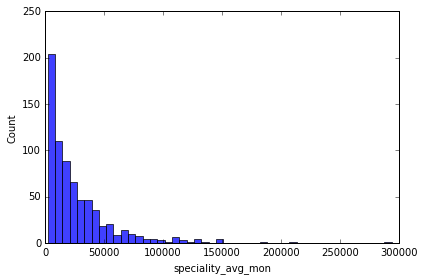

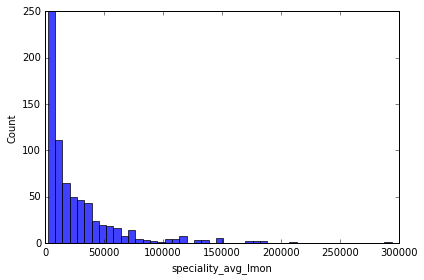

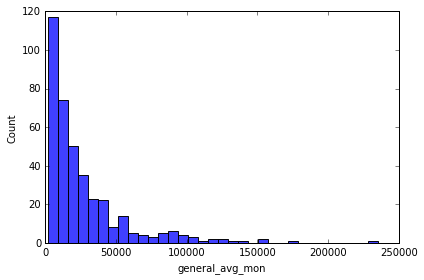

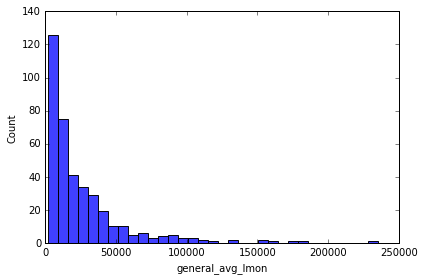

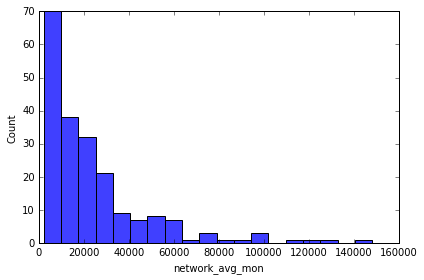

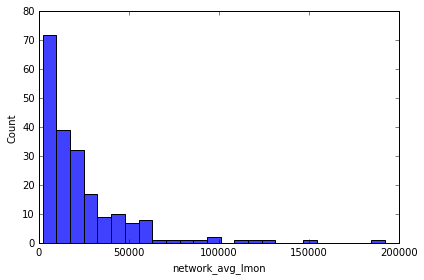

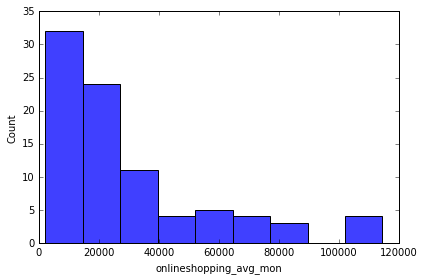

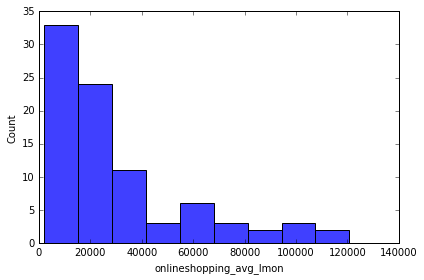

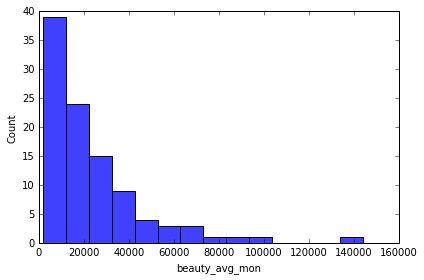

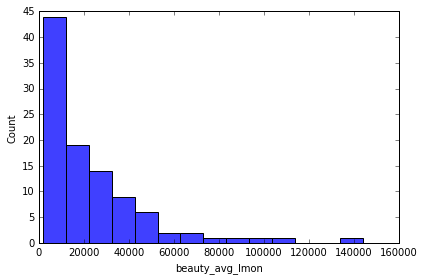

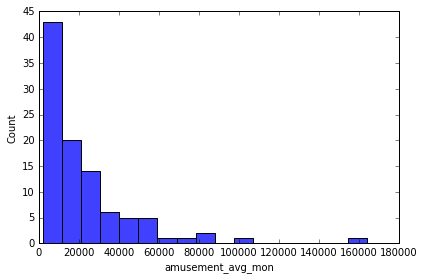

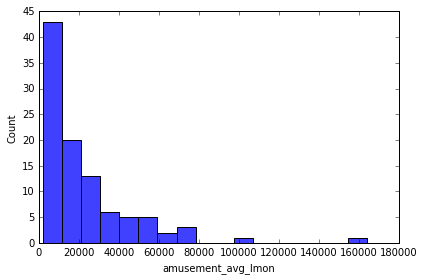

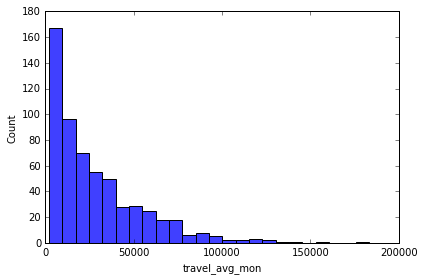

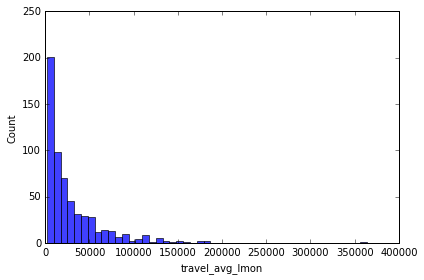

In [21]:
histplot('onlineservice_avg_mon')
histplot('onlineservice_avg_lmon')
print('\n')
histplot('cashing_avg_mon')
histplot('cashing_avg_lmon')
print('\n')
histplot('food_avg_mon')
histplot('food_avg_mon.1')
print('\n')
histplot('speciality_avg_mon')
histplot('speciality_avg_lmon')
print('\n')
histplot('general_avg_mon')
histplot('general_avg_lmon')
print('\n')
histplot('network_avg_mon')
histplot('network_avg_lmon')
print('\n')
histplot('onlineshopping_avg_mon')
histplot('onlineshopping_avg_lmon')
print('\n')
histplot('beauty_avg_mon')
histplot('beauty_avg_lmon')
print('\n')
histplot('amusement_avg_mon')
histplot('amusement_avg_lmon')
print('\n')
histplot('travel_avg_mon')
histplot('travel_avg_lmon')
#all field has right-skewed histogram
#Check correlation between average per month and last month transcation of each field

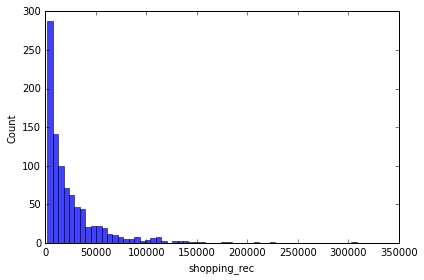

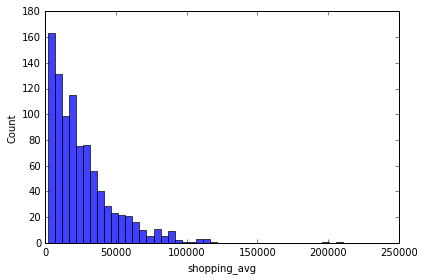

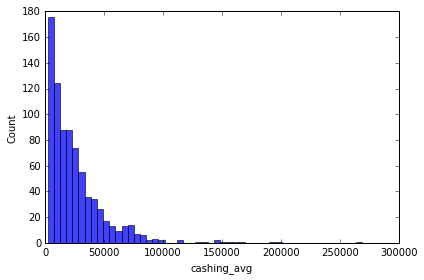

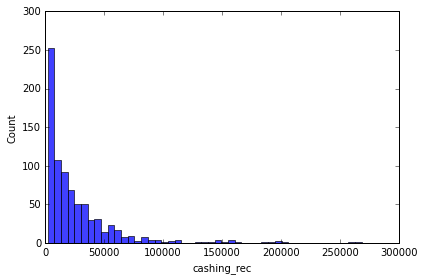

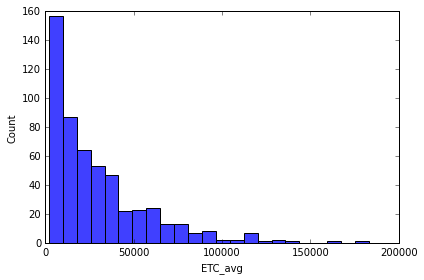

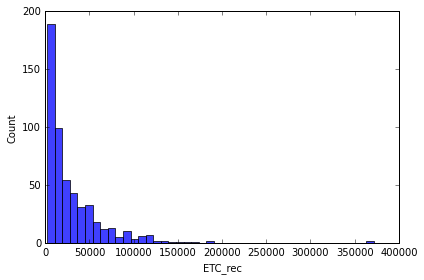

In [22]:
histplot('shopping_rec')
histplot('shopping_avg')
histplot('cashing_avg')
histplot('cashing_rec')
histplot('ETC_avg')
histplot('ETC_rec')
#recent spending > avg check correlation of each field
#All data also right-skewed

In [23]:
#Remove age outlier
df = df[df.Age != 200]

In [24]:
#Descriptive Statistic of Categorical Variable
df_category.describe()

,Response,Sex,Card_type,Shopping,Cashing,ETC,Card_grade,Job,On_the_job,marriage,...,questionnaire5,generation,contraction_year,contraction_day,contraction_mon,contraction_day_JP,No_function,No_member_store_use,No_category_use,No_records
count,1000,1000,1000,1000.0,1000.0,1000.0,1000,706,1000,999,...,1000.0,1000,1000.0,1000.0,1000.0,1000,1000.0,1000.0,1000.0,1000.0
unique,2,2,4,2.0,2.0,2.0,8,9,2,2,...,6.0,7,1.0,7.0,4.0,7,4.0,12.0,8.0,20.0
top,no reply,F,original,1.0,1.0,0.0,silver card,part time job,working,unmarried,...,0.0,30s,2003.0,7.0,3.0,Saturday,2.0,3.0,3.0,3.0
freq,840,579,396,748.0,551.0,722.0,346,164,584,556,...,915.0,385,1000.0,159.0,329.0,159,466.0,222.0,302.0,180.0


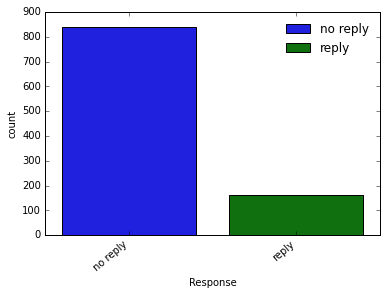

<Figure size 1080x360 with 0 Axes>

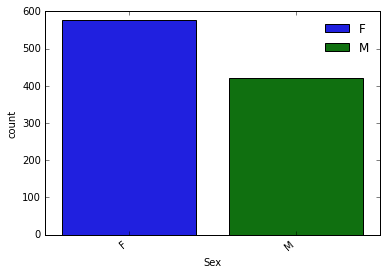

<Figure size 1080x360 with 0 Axes>

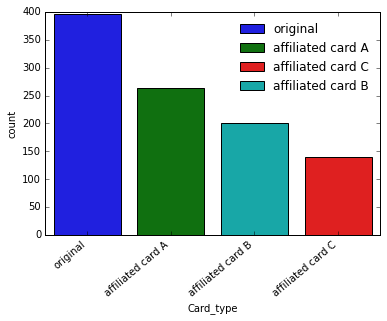

<Figure size 1080x360 with 0 Axes>

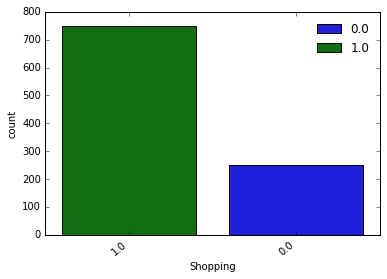

<Figure size 1080x360 with 0 Axes>

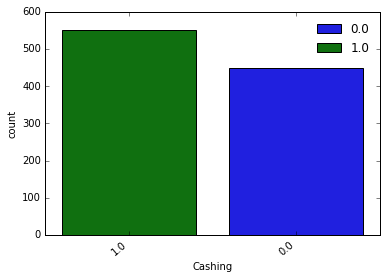

<Figure size 1080x360 with 0 Axes>

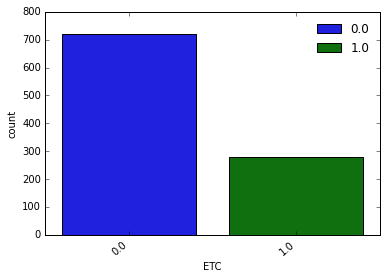

<Figure size 1080x360 with 0 Axes>

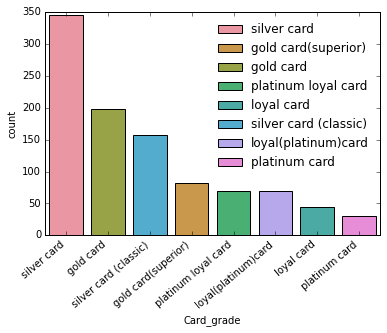

<Figure size 1080x360 with 0 Axes>

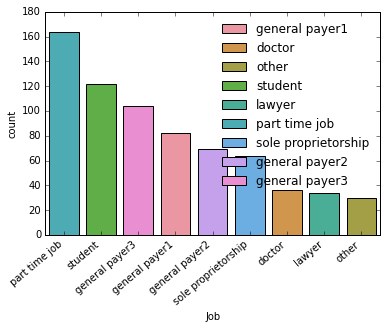

<Figure size 1080x360 with 0 Axes>

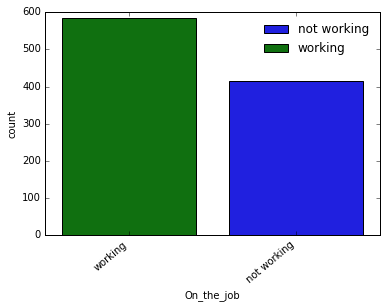

<Figure size 1080x360 with 0 Axes>

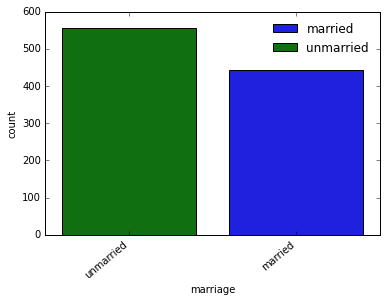

<Figure size 1080x360 with 0 Axes>

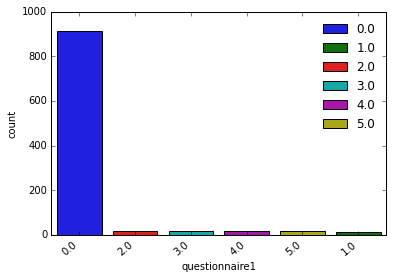

<Figure size 1080x360 with 0 Axes>

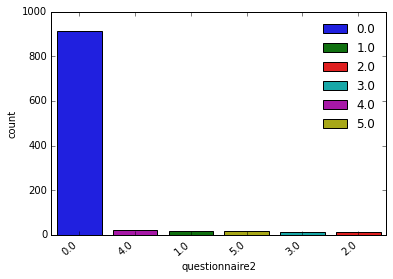

<Figure size 1080x360 with 0 Axes>

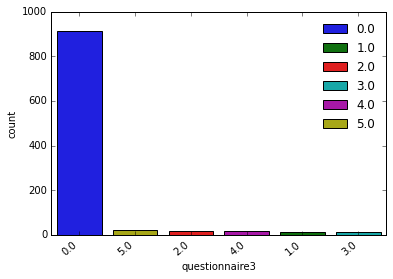

<Figure size 1080x360 with 0 Axes>

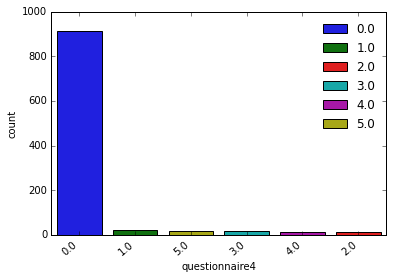

<Figure size 1080x360 with 0 Axes>

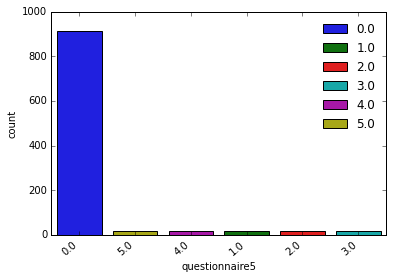

<Figure size 1080x360 with 0 Axes>

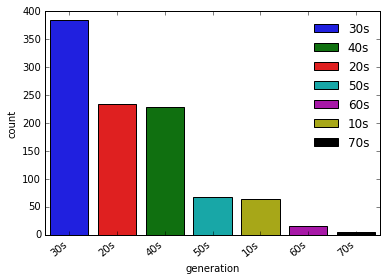

<Figure size 1080x360 with 0 Axes>

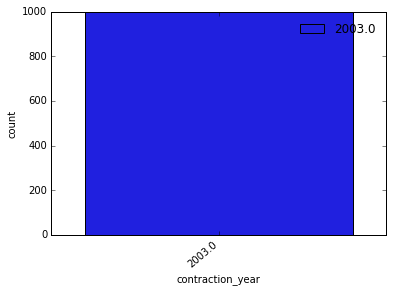

<Figure size 1080x360 with 0 Axes>

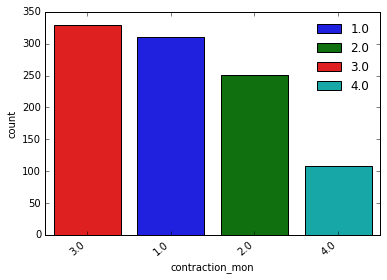

<Figure size 1080x360 with 0 Axes>

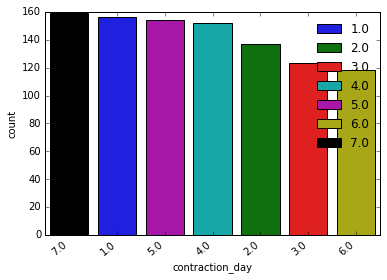

<Figure size 1080x360 with 0 Axes>

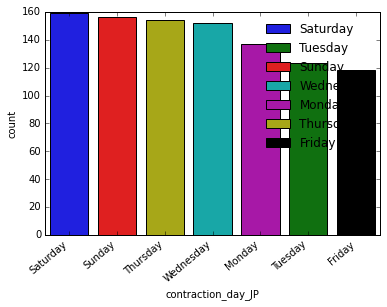

<Figure size 1080x360 with 0 Axes>

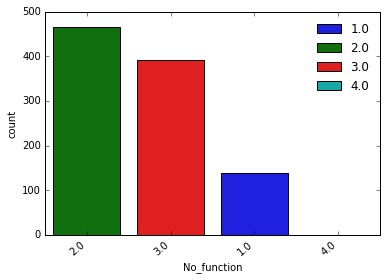

<Figure size 1080x360 with 0 Axes>

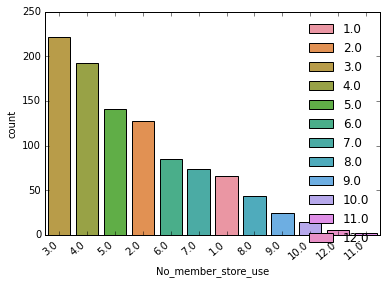

<Figure size 1080x360 with 0 Axes>

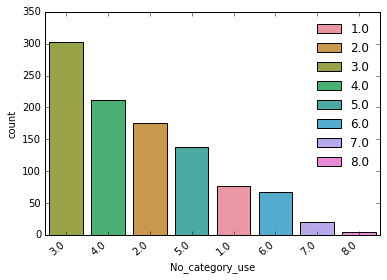

<Figure size 1080x360 with 0 Axes>

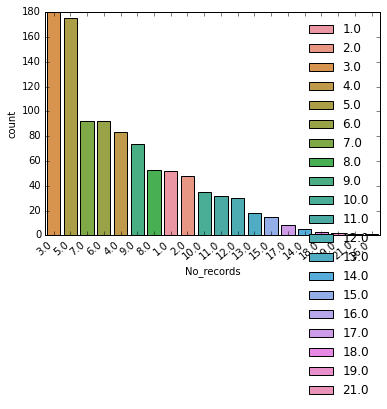

<Figure size 1080x360 with 0 Axes>

In [25]:
#Visualization in category variable
def countplot(var):
 ax = sns.countplot(x = var, hue = var, data = df, order = df[var].value_counts().index, dodge = False)
 plt.figure(figsize =(15,5))
 ax.legend(frameon = False)
 ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #to see the category better
 plt.show() 
 
countplot('Response')
countplot('Sex')
countplot('Card_type')
countplot('Shopping')
countplot('Cashing')
countplot('ETC')
countplot('Card_grade')
#Change similar card grade into one grade
countplot('Job')
#general payer1,2,3 fall into the same type of job as general payer
countplot('On_the_job')
#Check with bivariate does the On_the_job give same info with Job
countplot('marriage')
countplot('questionnaire1')
countplot('questionnaire2')
countplot('questionnaire3')
countplot('questionnaire4')
countplot('questionnaire5')
#questionnaire only for customer in response
countplot('generation')
#Check correspondency between generation and age
countplot('contraction_year')
countplot('contraction_mon')
countplot('contraction_day')
#Check if contraction-year, contraction_mon, contraction_day is composite variable of Card_contraction
countplot('contraction_day_JP')
#Check correspondency between contraction_day and contraction_day_JP
countplot('No_function') #correlation to no_records
countplot('No_member_store_use') #correlation to no_records
countplot('No_category_use') #correlation to no_records
countplot('No_records')

In [26]:
#Change general payer 1,2,3 into general
df['Job'] = df['Job'].replace(['general payer1','general payer2', 'general payer3'], 'general payer')

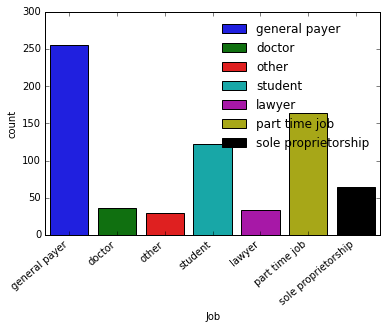

<Figure size 1080x360 with 0 Axes>

In [27]:
#Final job category
ax = sns.countplot(x="Job", hue = "Job", data=df, dodge = False)
plt.figure(figsize =(15,5))
ax.legend(frameon = False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [28]:
#Sort similar grade of cards into same grade
df['Card_grade'] = df['Card_grade'].replace('gold card(superior)', 'gold card')
df['Card_grade'] = df['Card_grade'].replace(['loyal(platinum)card', 'platinum loyal card', 'loyal card'], 'platinum card')
df['Card_grade'] = df['Card_grade'].replace('silver card (classic)', 'silver card')

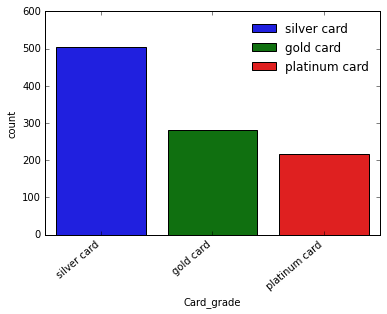

<Figure size 1080x360 with 0 Axes>

In [29]:
#Final Card_Grade Category
ax = sns.countplot(x="Card_grade", hue = 'Card_grade', data=df, dodge = False)
plt.figure(figsize =(15,5))
ax.legend(frameon = False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [30]:
#Check if missing value have been all removed
df.isnull().values.any()

True

In [31]:
#Check NaN in Categorical variable
df_category.isnull().sum()

Response                 0
Sex                      0
Card_type                0
Shopping                 0
Cashing                  0
ETC                      0
Card_grade               0
Job                    294
On_the_job               0
marriage                 1
questionnaire1           0
questionnaire2           0
questionnaire3           0
questionnaire4           0
questionnaire5           0
generation               0
contraction_year         0
contraction_day          0
contraction_mon          0
contraction_day_JP       0
No_function              0
No_member_store_use      0
No_category_use          0
No_records               0
dtype: int64

In [32]:
#Check NaN in continous variable
df_continous.isnull().sum()

Age                          0
onlineservice_avg_mon      734
cashing_avg_mon            201
food_avg_mon               761
speciality_avg_mon         293
general_avg_mon            616
network_avg_mon            795
onlineshopping_avg_mon     913
beauty_avg_mon             899
amusement_avg_mon          901
travel_avg_mon             412
onlineservice_avg_lmon     734
cashing_avg_lmon           201
food_avg_mon.1             761
speciality_avg_lmon        293
general_avg_lmon           616
network_avg_lmon           795
onlineshopping_avg_lmon    913
beauty_avg_lmon            899
amusement_avg_lmon         901
travel_avg_lmon            412
shopping_avg                81
cashing_avg                200
ETC_avg                    465
shopping_rec                81
cashing_rec                200
ETC_rec                    465
max_charge                   0
min_charge                   0
avg_charge                   0
charge_avg_per_mon           0
charge_lmon                  0
charge_M

In [33]:
#Check missing value in datetime
df_datetime.isnull().sum().sum()

0

In [34]:
df_datetime.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,min_used_date,max_used_date,Card_contraction,expiration_date
count,1000,1000,1000,1000
unique,34,33,101,5
top,2010-04-01 00:00:00,2012-11-01 00:00:00,2003-04-09 00:00:00,2019-03-16 00:00:00
freq,112,158,20,325
first,2010-01-01 00:00:00,2010-04-01 00:00:00,2003-01-01 00:00:00,2019-01-16 00:00:00
last,2012-10-01 00:00:00,2012-12-01 00:00:00,2003-04-11 00:00:00,2019-12-15 00:00:00


In [ ]:
df.info()
#drop max_used_date and min_used date
#drop expiration_date as it only show expiration date in 2019

In [36]:
#Replace missing value in category with Unknown
df[['Job','marriage']] = df[['Job','marriage']].fillna('Unknown')

In [37]:
#Replace missing value in continous variable with 0
df[['Age', 'onlineservice_avg_mon', 'cashing_avg_mon', 'food_avg_mon', 'speciality_avg_mon', 'general_avg_mon', 'network_avg_mon', 'onlineshopping_avg_mon', 'beauty_avg_mon', 'amusement_avg_mon', 'travel_avg_mon', 'onlineservice_avg_lmon', 'cashing_avg_lmon', 'food_avg_mon.1', 'speciality_avg_lmon', 'general_avg_lmon', 'network_avg_lmon', 'onlineshopping_avg_lmon', 'beauty_avg_lmon', 'amusement_avg_lmon', 'travel_avg_lmon', 'shopping_avg', 'cashing_avg', 'ETC_avg', 'shopping_rec', 'cashing_rec', 'ETC_rec', 'max_charge', 'min_charge', 'avg_charge', 'charge_avg_per_mon', 'charge_lmon','charge_Monday','charge_Tuesday','charge_Wednesday','charge_Thursday','charge_Friday','charge_Saturday','charge_Sunday']] = df[['Age', 'onlineservice_avg_mon', 'cashing_avg_mon', 'food_avg_mon', 'speciality_avg_mon', 'general_avg_mon', 'network_avg_mon', 'onlineshopping_avg_mon', 'beauty_avg_mon', 'amusement_avg_mon', 'travel_avg_mon', 'onlineservice_avg_lmon', 'cashing_avg_lmon', 'food_avg_mon.1', 'speciality_avg_lmon', 'general_avg_lmon', 'network_avg_lmon', 'onlineshopping_avg_lmon', 'beauty_avg_lmon', 'amusement_avg_lmon', 'travel_avg_lmon', 'shopping_avg', 'cashing_avg', 'ETC_avg', 'shopping_rec', 'cashing_rec', 'ETC_rec', 'max_charge', 'min_charge', 'avg_charge', 'charge_avg_per_mon', 'charge_lmon','charge_Monday','charge_Tuesday','charge_Wednesday','charge_Thursday','charge_Friday','charge_Saturday','charge_Sunday']].fillna(0)

In [ ]:
#Clean DataFrame
df.info()

What have been done:
1. Remove outlier and fill missing value
2. Statistics and visualization for each data type to conclude next step in bivariate analysis
3. Change general payer 1,2,3 to generalpayer
4. Change similar Card_grade to one type

What to do in bivariate analysis:
Continous-continous
1. Check correlation between max_charge and min_charge to avg_charge and avg_charge with charge_avg_per_mon
2. Check each day charge correlation to each other: 'charge_Sunday','charge_Monday',etc. 
3. Check correlation of 'charge_avg_per_mon' and 'charge_lmon' also average per month and last month of each field in spending such as onlineservice, onlineshopping, beauty,etc.
4. Check recent and average of shopping, cashing and ETC

Category-category:
1. Check correlation of On_the_job with Job
2. Check correlation of Age and Generation
3. Check contraction_mon and contraction_year if it's the same as contraction_card
3. Check contraction_day and contraction_day_JP correlation
4. Check correlation of No_category_use, No_member_use, No_function, No_records
5. Check if questionnaire only filled by responsive

What to do in multivariate analysis:
1. Drop NO, max_used_date, min_used_date, expiration_date from columns
2. Drop variable picked in bivariate analysis

# Bivariate Analysis

### Relationship between numeric variable with numeric variable

1. avg_charge, max_charge, min_charge to avg_charge_per_mon

In [39]:
#Scatter Plot avg_charge and charge_avg_per_mon
def scatter(x,y):
  plt.scatter(df[x],df[y])
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()
#positive correlation

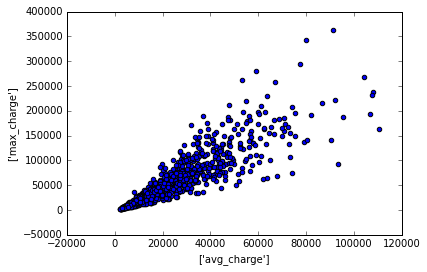

In [40]:
##Scatter plot of max_charge
scatter(['avg_charge'],['max_charge'])

In [41]:
#Max_charge correlation coefficient with avg_charge
df[['avg_charge','max_charge']].corr()

,avg_charge,max_charge
avg_charge,1.000000,0.886341
max_charge,0.886341,1.000000


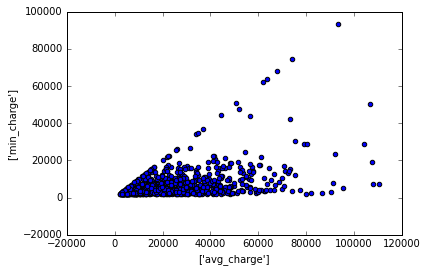

In [42]:
##Scatterplot of avg_charge with min_charge
scatter(['avg_charge'],['min_charge'])

In [43]:
#Min_charge coefficient with avg_charge
df[['avg_charge','min_charge']].corr()
#keep both

,avg_charge,min_charge
avg_charge,1.000000,0.450866
min_charge,0.450866,1.000000


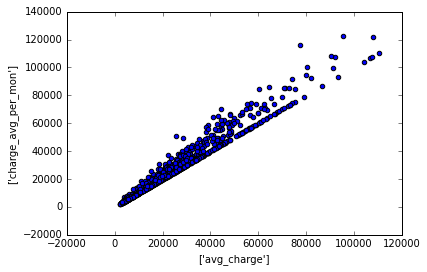

In [44]:
##Scatterplot of avg_charge and charge_avg_per_mon
scatter(['avg_charge'],['charge_avg_per_mon'])

In [45]:
#Correlation coefficient avg_charge and charge_avg_per_mon
df[['avg_charge','charge_avg_per_mon']].corr()
#keep both correlation as it is a strong correlation

,avg_charge,charge_avg_per_mon
avg_charge,1.000000,0.980227
charge_avg_per_mon,0.980227,1.000000


2. shopping_avg to shopping_rec, cashing_avg to cashing_rec, and ETC_rec to ETC_avg

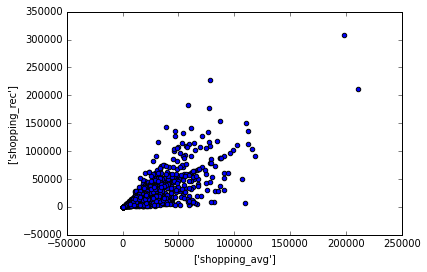

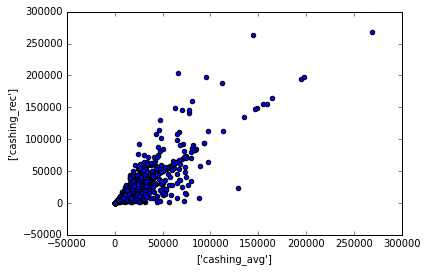

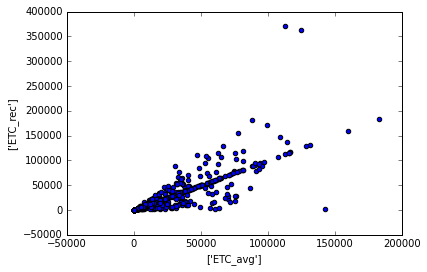

In [46]:
##Scatter plot of avg and rec from transaction type
scatter(['shopping_avg'],['shopping_rec'])
scatter(['cashing_avg'],['cashing_rec'])
scatter(['ETC_avg'],['ETC_rec'])

In [47]:
#Correlation coefficient shopping_avg and shopping_rec
df[['shopping_avg','shopping_rec']].corr()
#strong correlation keep both

,shopping_avg,shopping_rec
shopping_avg,1.000000,0.755417
shopping_rec,0.755417,1.000000


In [48]:
#Correlation coefficient cashing_avg and cashing_Rec
df[['cashing_avg','cashing_rec']].corr()
#strong correlation keep both

,cashing_avg,cashing_rec
cashing_avg,1.000000,0.852143
cashing_rec,0.852143,1.000000


In [49]:
#Correlation coefficient ETC_avg and ETC_rec
df[['ETC_avg','ETC_rec']].corr()
#strong correlation keep both

,ETC_avg,ETC_rec
ETC_avg,1.000000,0.854787
ETC_rec,0.854787,1.000000


In [ ]:
##Correlation between last month and average per month spending in each category
avg_lmon_corr = df[['onlineservice_avg_mon','onlineservice_avg_lmon', 'cashing_avg_mon','cashing_avg_lmon','food_avg_mon','food_avg_mon.1', 'speciality_avg_mon','speciality_avg_lmon', 'general_avg_mon','general_avg_lmon', 'network_avg_mon',  'network_avg_lmon', 'onlineshopping_avg_mon', 'onlineshopping_avg_lmon', 'beauty_avg_mon','beauty_avg_lmon', 'amusement_avg_mon', 'amusement_avg_lmon', 'travel_avg_mon','travel_avg_lmon', 'charge_avg_per_mon', 'charge_lmon']].corr()
avg_lmon_corr

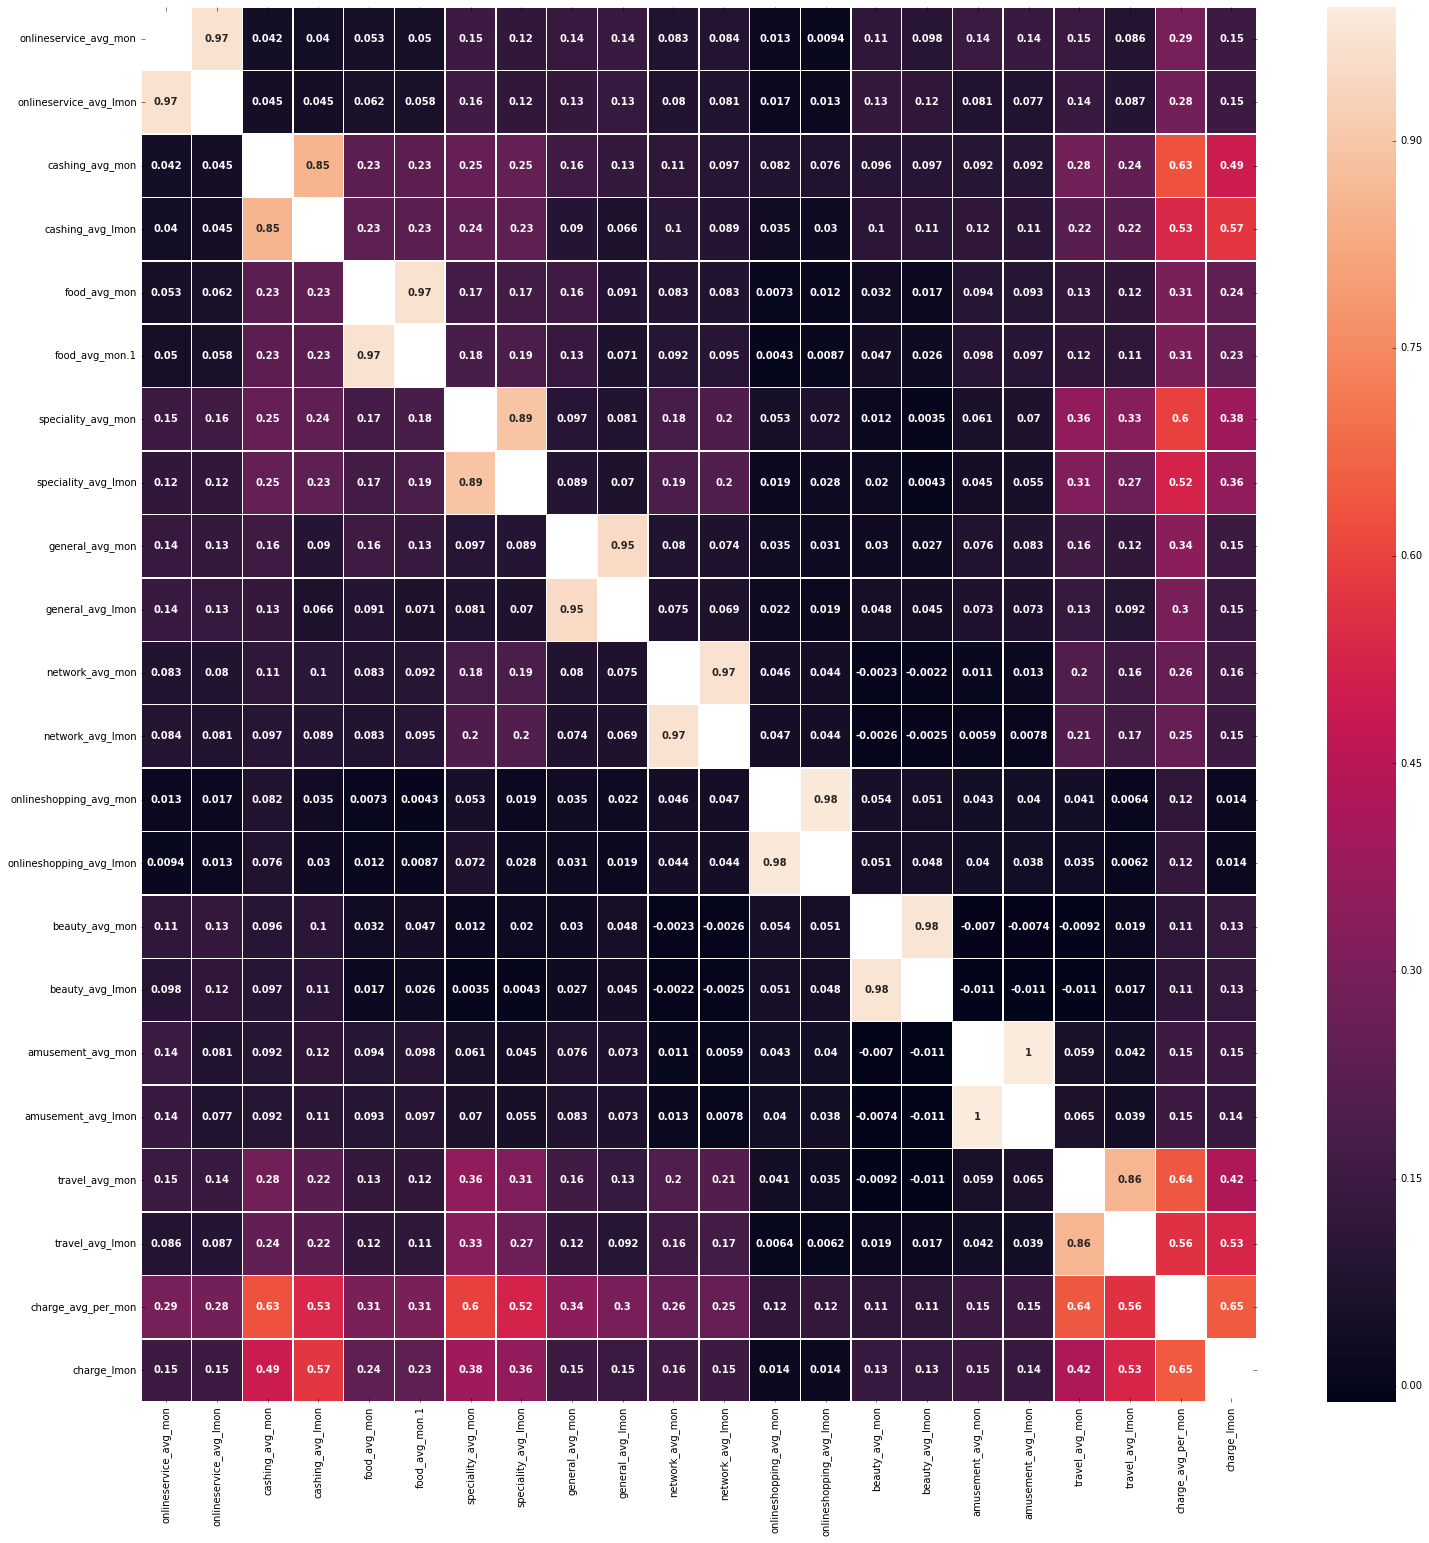

In [51]:
#Heatmap for correlation of last month and average per month spending in each field
max_column = np.max(avg_lmon_corr)
fig, ax = plt.subplots(figsize = (25,25))
sns.heatmap(avg_lmon_corr, mask = avg_lmon_corr == max_column, annot=True, linewidth = .5, ax=ax,
            annot_kws={"weight" : "bold"}, xticklabels="auto", yticklabels="auto")

#each field last month and average per month spending is correlated
#each field also has moderate to strong correlation to charge_avg_per_mon
#several field has moderate to strong correlation to charge_lmon
#don't drop any variable

In [ ]:
##Correlation of each day charge
charge_day_corr = df[['charge_Sunday', 'charge_Monday', 'charge_Tuesday', 'charge_Wednesday', 'charge_Thursday', 'charge_Friday', 'charge_Saturday']].corr()
charge_day_corr

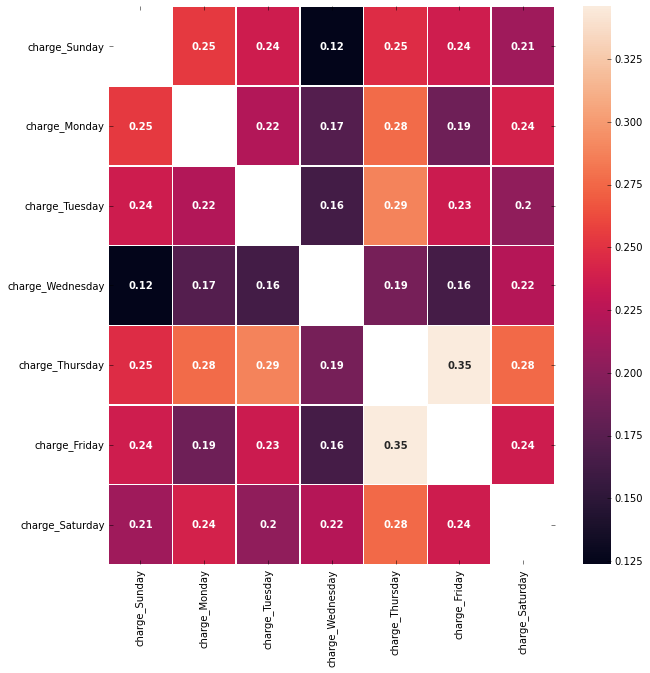

In [53]:
#Heatmap for correlation of each day charge
max_column_d = np.max(charge_day_corr)
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(charge_day_corr, mask = charge_day_corr == max_column_d, annot=True, linewidth = .5, ax=ax,
            annot_kws={"weight" : "bold"}, xticklabels="auto", yticklabels="auto")
#Before drop all variable look correlation with response as no strong correlation between each day

Conclusion for multivariate analysis : 
1. Drop each day charge variable

### Category to category correlation

In [54]:
def crosstab(x,y):
  crosstab = pd.crosstab(x,y)
  chi_square = st.chi2_contingency(crosstab)

  print(crosstab)
  print('\n')
  print(f'Chi-square =\n {chi_square}')

In [55]:
##Crosstab and Chi-square value Job, On_the_job
crosstab(df['Job'],df['On_the_job'])
#p-value = 0, dof = 7, rejecting null-hypothesis
#very strong correspondency drop one of them

On_the_job           not working  working
Job                                      
Unknown                      294        0
doctor                         0       36
general payer                  0      255
lawyer                         0       34
other                          0       30
part time job                  0      164
sole proprietorship            0       64
student                      122        0


Chi-square =
 (999.0, 1.980813276852696e-211, 7, array([[122.42642643, 171.57357357],
       [ 14.99099099,  21.00900901],
       [106.18618619, 148.81381381],
       [ 14.15815816,  19.84184184],
       [ 12.49249249,  17.50750751],
       [ 68.29229229,  95.70770771],
       [ 26.65065065,  37.34934935],
       [ 50.8028028 ,  71.1971972 ]]))


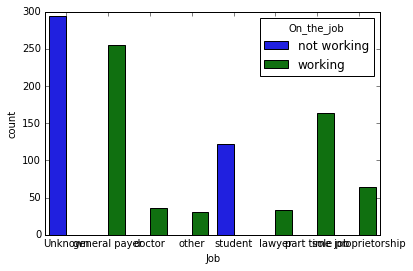

In [56]:
#Visualization with Job and On_the_Job
sns.countplot(x = 'Job', hue = 'On_the_job', data = df)
#True On_the_job only give detail to Job
#drop On_the_job

In [57]:
##Crosstab and Chi_square on contraction_day and contraction_day_JP
crosstab(df['contraction_day'], df['contraction_day_JP'])
#p-value = 0, dof = 36
#1-on-1 correspondency between contraction_day and contraction-day_JP
#drop 1 of them

contraction_day_JP  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  \
contraction_day                                                           
1.0                      0       0         0     156         0        0   
2.0                      0     137         0       0         0        0   
3.0                      0       0         0       0         0      123   
4.0                      0       0         0       0         0        0   
5.0                      0       0         0       0       154        0   
6.0                    118       0         0       0         0        0   
7.0                      0       0       159       0         0        0   

contraction_day_JP  Wednesday  
contraction_day                
1.0                         0  
2.0                         0  
3.0                         0  
4.0                       152  
5.0                         0  
6.0                         0  
7.0                         0  


Chi-square =
 (5993.999999999999, 

In [58]:
def crosstab(x):
  cross=pd.crosstab(df['Response'], x)
  print(cross)
  print("\n")

crosstab(df['questionnaire1'])
crosstab(df['questionnaire2'])
crosstab(df['questionnaire3'])
crosstab(df['questionnaire4'])
crosstab(df['questionnaire5'])
#questionnaire only filled with responsive costumer
#drop questionnaire

questionnaire1  0.0  1.0  2.0  3.0  4.0  5.0
Response                                    
no reply        839    0    0    0    0    0
reply            75   15   19   18   17   16


questionnaire2  0.0  1.0  2.0  3.0  4.0  5.0
Response                                    
no reply        839    0    0    0    0    0
reply            75   18   14   15   21   17


questionnaire3  0.0  1.0  2.0  3.0  4.0  5.0
Response                                    
no reply        839    0    0    0    0    0
reply            75   15   18   13   17   22


questionnaire4  0.0  1.0  2.0  3.0  4.0  5.0
Response                                    
no reply        839    0    0    0    0    0
reply            75   21   14   17   15   18


questionnaire5  0.0  1.0  2.0  3.0  4.0  5.0
Response                                    
no reply        839    0    0    0    0    0
reply            75   17   17   16   17   18




In [70]:
#crosstab card_contraction to contraction_mon and contraction_year and contraction_day
pd.crosstab(df['contraction_mon'], df['Card_contraction'])

Card_contraction,2003-01-01,2003-01-02,2003-01-03,2003-01-04,2003-01-05,2003-01-06,2003-01-07,2003-01-08,2003-01-09,2003-01-10,...,2003-04-02,2003-04-03,2003-04-04,2003-04-05,2003-04-06,2003-04-07,2003-04-08,2003-04-09,2003-04-10,2003-04-11
contraction_mon,,,,,,,,,,,,,,,,,,,,,
1.0,8,9,12,14,13,5,14,7,13,5,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,0,0,0,0,0,0,...,8,12,8,12,8,13,6,19,11,4


In [69]:
pd.crosstab(df['contraction_day'], df['Card_contraction'])
#Contraction_day show the day not the date
#Checked on the internet that days in contraction_day derived from Card_contraction

Card_contraction,2003-01-01,2003-01-02,2003-01-03,2003-01-04,2003-01-05,2003-01-06,2003-01-07,2003-01-08,2003-01-09,2003-01-10,...,2003-04-02,2003-04-03,2003-04-04,2003-04-05,2003-04-06,2003-04-07,2003-04-08,2003-04-09,2003-04-10,2003-04-11
contraction_day,,,,,,,,,,,,,,,,,,,,,
1.0,0,0,0,0,13,0,0,0,0,0,...,0,0,0,0,8,0,0,0,0,0
2.0,0,0,0,0,0,5,0,0,0,0,...,0,0,0,0,0,13,0,0,0,0
3.0,0,0,0,0,0,0,14,0,0,0,...,0,0,0,0,0,0,6,0,0,0
4.0,8,0,0,0,0,0,0,7,0,0,...,8,0,0,0,0,0,0,19,0,0
5.0,0,9,0,0,0,0,0,0,13,0,...,0,12,0,0,0,0,0,0,11,0
6.0,0,0,12,0,0,0,0,0,0,5,...,0,0,8,0,0,0,0,0,0,4
7.0,0,0,0,14,0,0,0,0,0,0,...,0,0,0,12,0,0,0,0,0,0


In [66]:
pd.crosstab(df['contraction_year'], df['Card_contraction'])
#same year in 2003 --> drop contraction_year
#drop card_contraction as it has 1-on-1 correspondency with contractionday, mon, year

Card_contraction,2003-01-01,2003-01-02,2003-01-03,2003-01-04,2003-01-05,2003-01-06,2003-01-07,2003-01-08,2003-01-09,2003-01-10,...,2003-04-02,2003-04-03,2003-04-04,2003-04-05,2003-04-06,2003-04-07,2003-04-08,2003-04-09,2003-04-10,2003-04-11
contraction_year,,,,,,,,,,,,,,,,,,,,,
2003.0,8,9,12,14,13,5,14,7,13,5,...,8,12,8,12,8,13,6,19,11,4


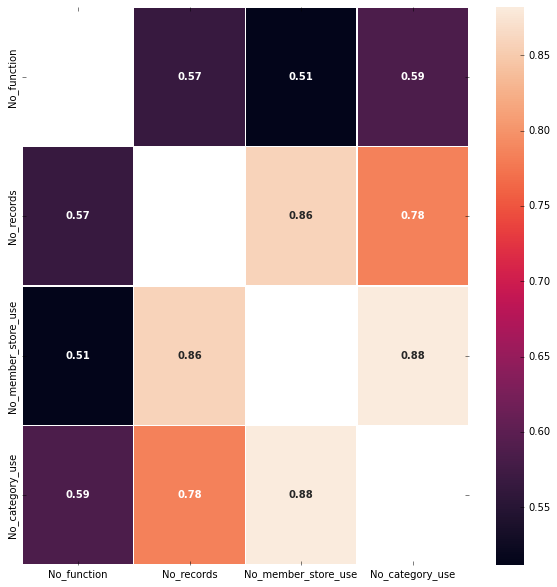

In [62]:
#Correlation and heatmap of No_function, No_records, No_member_Store_use, No_category_use
No_use_corr = df[['No_function', 'No_records', 'No_member_store_use', 'No_category_use']].corr()
max_column_u = np.max(No_use_corr)
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(No_use_corr, mask = No_use_corr == max_column_u, annot=True, linewidth = .5, ax=ax,
            annot_kws={"weight" : "bold"}, xticklabels="auto", yticklabels="auto")
#Drop No_function as it has moderate correlation with other category

1. Drop No_function, card_Contraction, contraction_year, questionnaire, contraction_day_JP, and On_the_job

### Continous and category variable correlation

1. Age and Generation

In [ ]:
#Crosstab and Chi-Square of Age and Generation
pd.crosstab(df['Age'], df['generation'])
#Age has correspondency with generation
#Show with boxplot for a better visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


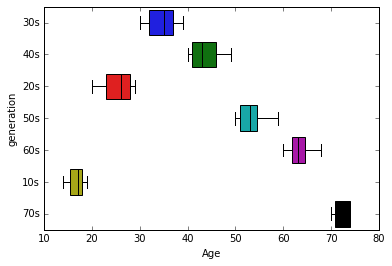

In [64]:
#Boxplot Age and Generation
sns.boxplot(df['Age'], df['generation'])
#True generation is group of age, drop 1 of them

Conclusion for multivariate analysis : drop generation

# Multivariate Analysis

What to do:

1. Check missing value
2. Drop NO, max_used_Date, min_used_date, charge_Monday, charge_Tuesday, charge_wednesday, charge_Thursday, charge_Friday, charge_Saturday, charge_Sunday, No_function, contraction_day, contraction_mon, contraction_year, questionnaire, contraction_day_JP, On_the_job, expiration_date and generation
3. Train test split
4. Decision Tree Classification with gini coefficient

In [ ]:
df.info()

In [73]:
df['Card_contraction'] = df['Card_contraction'].astype('object')

In [74]:
df1 = df.drop(['NO', 'max_used_date', 'min_used_date', 'charge_Monday', 'charge_Tuesday', 'charge_Wednesday', 'charge_Thursday', 'charge_Friday', 'charge_Saturday', 'charge_Sunday', 'No_function', 'contraction_day', 'contraction_mon', 'contraction_year', 'questionnaire1', 'questionnaire2', 'questionnaire3', 'questionnaire4', 'questionnaire5', 'contraction_day_JP', 'On_the_job', 'expiration_date', 'generation', 'Customer_ID'],axis = 1)

In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Response                 999 non-null    object 
 1   Sex                      999 non-null    object 
 2   Age                      999 non-null    float64
 3   Card_type                999 non-null    object 
 4   Shopping                 999 non-null    float64
 5   Cashing                  999 non-null    float64
 6   ETC                      999 non-null    float64
 7   Card_contraction         999 non-null    object 
 8   Card_grade               999 non-null    object 
 9   Job                      999 non-null    object 
 10  marriage                 999 non-null    object 
 11  onlineservice_avg_mon    999 non-null    float64
 12  cashing_avg_mon          999 non-null    float64
 13  food_avg_mon             999 non-null    float64
 14  speciality_avg_mon       9

In [88]:
#NaN filled with 0
df1.fillna(0)

,Age,Shopping,Cashing,ETC,onlineservice_avg_mon,cashing_avg_mon,food_avg_mon,speciality_avg_mon,general_avg_mon,network_avg_mon,...,Card_grade_platinum card,Card_grade_silver card,Job_doctor,Job_general payer,Job_lawyer,Job_other,Job_part time job,Job_sole proprietorship,Job_student,marriage_unmarried
0,35.0,1.0,0.0,0.0,0.0,23720.0,0.0,72300.0,0.0,16920.0,...,0,1,0,0,0,0,0,0,0,0
1,39.0,1.0,1.0,0.0,0.0,23174.0,33590.0,12210.0,29360.0,19630.0,...,0,0,0,1,0,0,0,0,0,1
2,43.0,1.0,1.0,1.0,0.0,11015.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
3,45.0,1.0,1.0,1.0,0.0,0.0,3860.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,33.0,1.0,0.0,0.0,0.0,11590.0,0.0,5270.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,1
996,61.0,1.0,0.0,0.0,0.0,0.0,16330.0,35156.0,0.0,37490.0,...,0,1,0,1,0,0,0,0,0,0
997,71.0,1.0,1.0,0.0,0.0,268490.0,28900.0,82550.0,0.0,0.0,...,0,1,1,0,0,0,0,0,0,0
998,50.0,0.0,0.0,1.0,0.0,24475.0,0.0,57880.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,1


In [89]:
#One-hot encodinh
df1 = pd.get_dummies(df1, drop_first=True)

In [90]:
#Split target and other column after encoding
target = 'Response_reply'
X = df1[df1.columns[df1.columns != target]]
y = df1[target]

In [91]:
#Splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
tree_data = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)
tree_data.fit(X, y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

In [81]:
y_train_pred = tree_data.predict(X_train)
y_pred = tree_data.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [83]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion entropy: 0.8900


In [84]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))

Model accuracy score with criterion entropy: 0.8974


In [85]:
print('Training set score: {:.4f}'.format(tree_data.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(tree_data.score(X_test, y_test)))

Training set score: 0.8974
Test set score: 0.8900


In [ ]:
plt.figure(figsize = (20,16))
tree.plot_tree(tree_data)

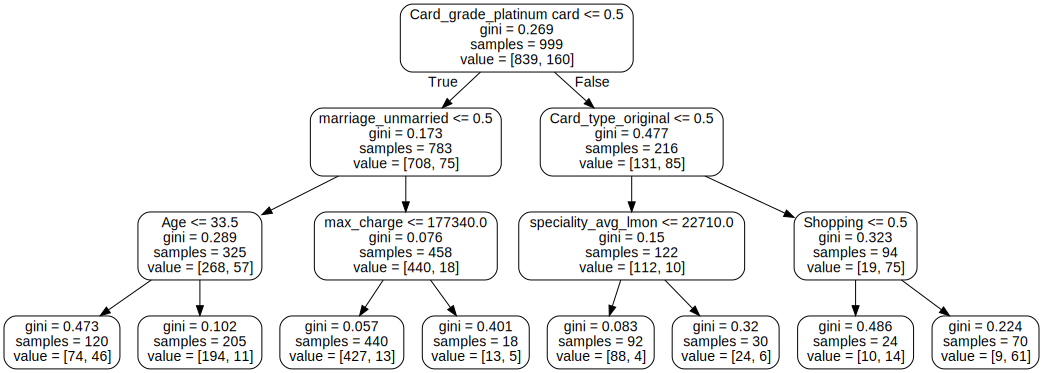

In [87]:
dot_data = tree.export_graphviz(tree_data, feature_names=X.columns, filled=False, rounded=True) 
graph = graphviz.Source(dot_data) 
graph